# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Bunachita, Aidan Joseph\
_Student No._: 2020-10991\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Aidan Joseph Quesada Bunachita**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

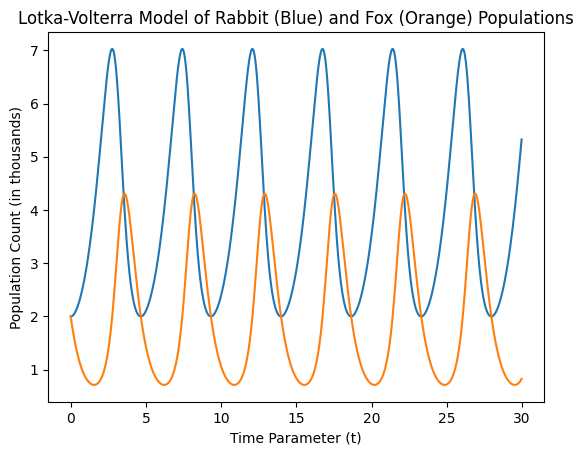

In [37]:
from numpy import arange, array
import matplotlib.pyplot as plt

a = 1
b = 0.5
c = 0.5
d = 2
x = 2
y = 2

t0 = 0
tf = 30
N = 1000        # arbitrary; defines # of points we'll be evaluating at (GEM check)
h = (tf - t0)/N

tpoints = arange(t0, tf, h)
xpoints = []
ypoints = []

def eq(r, t):                   # accepts the ARRAY r containing (x,y)
    xf = a*r[0] - b*r[0]*r[1]   # inputs (x,y) to the differential equation involving dx/dt
    yf = c*r[0]*r[1] - d*r[1]   # inputs (x,y) to the differential equation involving dy/dt
    return array([xf, yf])      # returns their outputs as the "new" (x, y) value

r = array([x, y]) # initial (x,y)-value

for t in tpoints:
    
    xpoints.append(r[0])        # appends the previous (x,y)-value - in the initial call, the value (x_0, y_0) is appended
    ypoints.append(r[1])

    k1 = h*eq(r, t)                     # applies the 4th-order Runge-Kutta method from Newman (Example 8.3)
    k2 = h*eq(r + 0.5*k1, t + 0.5*h)    # computes k1 to k4, the terms we'll be using to approximate our next (x,y)-value
    k3 = h*eq(r + 0.5*k2, t + 0.5*h)
    k4 = h*eq(r + k3, t + h)
    
    r = r + (k1 + 2*k2 + 2*k3 + k4)/6  # the approximate value of the (t+1)th (x,y) coordinates, using k1-k4 and the (t)th (x,y) coordinates, which are currently stored in r. 


plt.plot(tpoints, xpoints)
plt.plot(tpoints, ypoints)
plt.xlabel("Time Parameter (t)")
plt.ylabel("Population Count (in thousands)")
plt.title("Lotka-Volterra Model of Rabbit (Blue) and Fox (Orange) Populations")
plt.show()

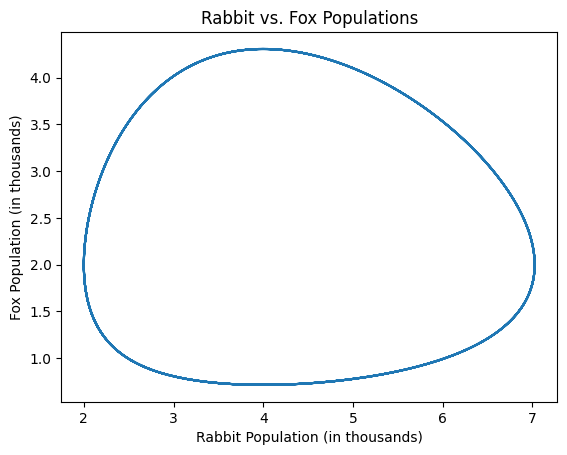

In [26]:
plt.plot(xpoints, ypoints)
plt.xlabel("Rabbit Population (in thousands)")
plt.ylabel("Fox Population (in thousands)")
plt.title("Rabbit vs. Fox Populations")
plt.show()

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


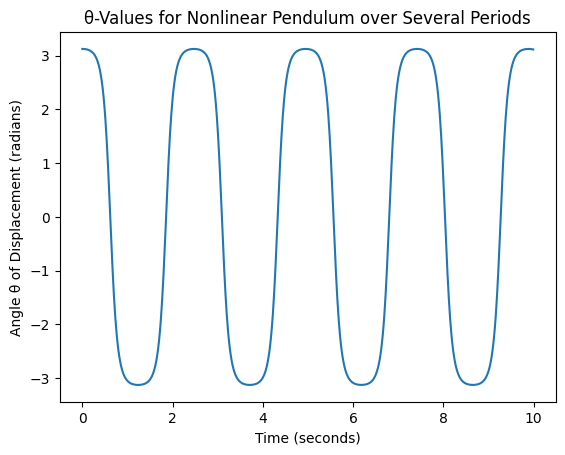

In [36]:
from numpy import arange, array, sin, pi
import matplotlib.pyplot as plt


g = 9.81
l = 0.1

def pend(r, t):
    theta = r[0]
    omega = r[1]
    fomega = -(g/l)*sin(theta)
    return array([omega, fomega])   # ftheta is just omega

theta_0 = pi*179/180                # initial angle, in RADIANS
omega_0 = 0                         # ω_0 is zero since it's released from STANDSTILL
r = array([theta_0, omega_0])       # initial (θ,ω)-value

t0 = 0
tf = 10
N = 1000
h = (tf-t0)/N

tpoints = arange(t0, tf, h)
thetapoints = []
omegapoints = []

for t in tpoints:
    
    thetapoints.append(r[0])        
    omegapoints.append(r[1])

    k1 = h*pend(r, t)                      # the 4th-order Runge-Kutta method, same as above
    k2 = h*pend(r + 0.5*k1, t + 0.5*h)   
    k3 = h*pend(r + 0.5*k2, t + 0.5*h)
    k4 = h*pend(r + k3, t + h)
    
    r = r + (k1 + 2*k2 + 2*k3 + k4)/6  


plt.plot(tpoints, thetapoints)
plt.xlabel("Time (seconds)")
plt.ylabel("Angle θ of Displacement (radians)")
plt.title("θ-Values for Nonlinear Pendulum over Several Periods")
plt.show()